In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
mnist_train = pd.read_csv ("datasets/mnist_train.csv")
X_train = np.array (mnist_train.values [:, 1:])
y_train = np.array (mnist_train.values [:, 0])

mnist_test = pd.read_csv ("datasets/mnist_test.csv")
X_test = np.array (mnist_test.values [:, 1:])
y_test = np.array (mnist_test.values [:, 0])

In [171]:
Y_train, Y_test = np.zeros((y_train.shape[0], 10)), np.zeros((y_test.shape[0], 10))
for i in range(len(y_train)):
    Y_train [i, y_train[i]] = 1;

for k in range(len(y_test)):
    Y_test[k, y_test[k]] = 1;

In [172]:
#printing the shape of the datasets
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
print ("Train set: X: ", X_train.shape, "  Y: ", Y_train.shape)
print ("Test set: X: ", X_test.shape, "  Y: ", Y_test.shape)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Train set: X:  (784, 60000)   Y:  (10, 60000)
Test set: X:  (784, 10000)   Y:  (10, 10000)


In [173]:
np.random.seed (1)

In [232]:
#initializing the model parameters
def initialize_params (shape):
    
    parameters = {}
    
    for i in range (0, len (shape) - 1):
        
        w = np.random.rand (shape [i+1], shape [i])
        b = np.zeros ((shape [i+1],1))
        
        parameters ['W' + str (i+1)] = w
        parameters ['b' + str (i+1)] = b
    
    return parameters

In [211]:
def forward_prop (X, W, b):
    
    z = np.dot (W, X) + b
    a = softmax (z)
    return a

In [205]:
def softmax(x):
    x = np.exp (x)
    return x/np.sum (x, axis = 0, keepdims = True)

In [206]:
def compute_cost (Y, a):
    
    m = Y.shape[1]
    
    cost = (-1/m) * np.sum (Y * np.log (a))
    
    return cost

In [207]:
def backprop(X, Y, A):
    m = Y.shape[1]
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    return dw, db

In [215]:
def train (X, Y, parameters, l_rate, iterations):
    cost = []
    for i in range(iterations):
        a = forward_prop (X, parameters ['W1'], parameters ['b1'])
        
        c = compute_cost(Y, a)
        dw, db = backprop(X, Y, a)

        parameters ['W1'] = parameters['W1'] - l_rate * dw.T
        parameters ['b1'] = parameters['b1'] - l_rate * db.T

        if i % 100 == 0:
            print("Iteration: {}, Loss: {}".format (i, c))
        
        cost.append(c)
    return parameters, cost

In [234]:
def model (X, Y, iters, l_rate, shape):
    parameters = initialize_params (shape)
    parameters, cost = train (X, Y, parameters, l_rate, iters)
    return parameters, cost

In [235]:

parameters, cost = mprobs = forward(parameters,X)
    y_hat = np.argmax(probs, axis=0)
    Y = np.argmax(Y, axis=0)
    accuracy = (y_hat == Y).mean()odel (X_train, Y_train, 1000, 0.01, [X_train.shape [0], 10])

Iteration: 0, Loss: 4.310907250363945
Iteration: 100, Loss: 2.5076947778118917
Iteration: 200, Loss: 1.911330466056339
Iteration: 300, Loss: 1.5728254554434224
Iteration: 400, Loss: 1.3532499391817554
Iteration: 500, Loss: 1.2019281692765238
Iteration: 600, Loss: 1.0922716753722401
Iteration: 700, Loss: 1.0094117241957632
Iteration: 800, Loss: 0.9446125794951432
Iteration: 900, Loss: 0.8924921064840156


In [236]:
def accuracy (X, Y, parameters):
    a = forward_prop (X, parameters ['W1'], parameters ['b1'])
    a = np.argmax (a, axis=0)
    Y = np.argmax (Y, axis=0)
    acc = (a == Y).mean ()

    return acc * 100

In [237]:
accuracy (X_test, Y_test, parameters)

74.76

In [238]:
accuracy (X_train, Y_train, parameters)

73.09166666666667

In [239]:
print (parameters['W1'].shape, parameters['b1'].shape)

(10, 784) (10, 1)


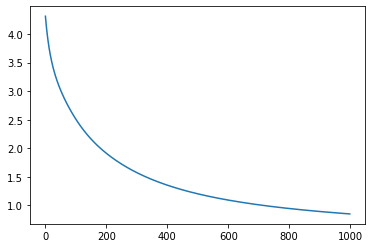

In [240]:
plt.plot(range(len(cost)),cost)